<a href="https://colab.research.google.com/github/asalimw/Network-Analysis-Criminal-Network/blob/main/Network_Analysis_Criminal_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Investigating a time-varying criminal network**

A time-varying criminal network that is repeatedly disturbed by police forces. The data for this problem can be found in the CAVIAR directory of the data archive.

The CAVIAR investigation lasted two years and ran from 1994 to 1996. The operation brought together investigation units of the Montréal police and the Royal Canadian Mounted Police of Canada. During this two year period, 11 wiretap warrants, valid for a period of about two months each, were obtained (the 11 matrices contained in phase1.csv, phase2.csv,  correspond to these eleven, two month wiretap phases).

This case is interesting because, unlike other investigative strategies, the mandate of the CAVIAR project was to seize the drugs without arresting the perpetrators. During this period, imports of the trafficking network were hit by the police on eleven occasions. The arrests took place only at the end of the investigation. Monetary losses for traffickers were estimated at  million dollars. Eleven seizures took place throughout the investigation. Some phases included no seizures, and others included multiple. The following summarizes the  seizures:

Phase 4	1 seizure	$2,500,000	300 kg of marijuana
Phase 6	3 seizures	$1,300,000	2 x 15 kg of marijuana + 1 x 2 kg of cocaine
Phase 7	1 seizure	$3,500,000	401 kg of marijuana
Phase 8	1 seizure	$360,000	9 kg of cocaine
Phase 9	2 seizures	$4,300,000	2 kg of cocaine + 1 x 500 kg marijuana
Phase 10	1 seizure	$18,700,000	2200 kg of marijuana
Phase 11	2 seizures	$1,300,000	12 kg of cocaine + 11 kg of cocaine
This case offers a rare opportunity to study a criminal network in upheaval from police forces. This allows us to analyze changes in the network structure and to survey the reaction and adaptation of the participants while they were subjected to an increasing number of distressing constraints.

The network consists of 110 (numbered) players. Players 1-82 are the traffickers. Players 83-110 are the non-traffickers (financial investors; accountants; owners of various importation businesses, etc.). Initially, the investigation targeted Daniel Serero, the alleged mastermind of a drug network in downtown Montréal, who attempted to import marijuana to Canada from Morocco, transiting through Spain. After the first seizure, happening in Phase 4, traffickers reoriented to cocaine import from Colombia, transiting through the United States.

According to the police, the role of 23 of the players in the “Serero organization" are the following, listed by name (unique id):

Daniel Serero (n1) : Mastermind of the network.

Pierre Perlini (n3) : Principal lieutenant of Serero, he executes Serero's instructions.

Alain (n83) and Gérard (n86) Levy : Investors and transporters of money.

Wallace Lee (n85) : Takes care of financial affairs (accountant).

Gaspard Lino (n6): Broker in Spain.

Samir Rabbat (n11): Provider in Morocco.

Lee Gilbert (n88): Trusted man of Wallace Lee (became an informer after the arrest).

Beverly Ashton (n106): Spouse of Lino, transports money and documents.

Antonio Iannacci (n89): Investor.

Mohammed Echouafni (n84): Moroccan investor.

Richard Gleeson (n5), Bruno de Quinzio (n8) and Gabrielle Casale (n76) : Charged with recuperating the marijuana.

Roderik Janouska (n77): Individual with airport contacts.

Patrick Lee (n87): Investor.

Salvatore Panetta (n82): Transport arrangements manager.

Steve Cunha (n96): Transport manager, owner of a legitimate import company (became an informer after the arrest).

Ernesto Morales (n12): Principal organizer of the cocaine import, intermediary between the Colombians and the Serero organization.

Oscar Nieri (n17): The handyman of Morales.

Richard Brebner (n80): Was transporting the cocaine from the US to Montréal.

Ricardo Negrinotti (n33): Was taking possession of the cocaine in the US to hand it to Brebner.

Johnny Pacheco (n16): Cocaine provider.

In the data files (phase1.csv, phase2.csv, ), you will find matrices that report the number of wiretapped correspondences between the above players in the network, where players are identified by their unique id. You will be analyzing this time-varying network, giving a rough sketch of its shape, its evolution and the role of the actors in it.

Paper:https://www.researchgate.net/publication/292304919_Modeling_Verdict_Outcomes_Using_Social_Network_Measures_The_Watergate_and_Caviar_Network_Cases

In [ ]:
import numpy as np 
import networkx as nx
import pandas as pd

from itertools import permutations, combinations

phases = {}
G = {}
for i in range(1,12): 
    var_name = "phase" + str(i)
    file_name = "https://raw.githubusercontent.com/ragini30/Networks-Homework/main/" + var_name + ".csv"
    phases[i] = pd.read_csv(file_name, index_col = ["players"])
    phases[i].columns = "n" + phases[i].columns
    phases[i].index = phases[i].columns
    G[i] = nx.from_pandas_adjacency(phases[i])
    G[i].name = var_name

# this code also renames the actors from integer identifiers to strings of the 
# kind “n1", “n2" etc, to be more consistent with notation. It then creates 
# networkx graphs from the matrices and stores them in the G dictionary by 
# their phase number.

In [ ]:
# https://realpython.com/pandas-python-explore-dataset/
# https://www.geeksforgeeks.org/python-dictionary/
# https://realpython.com/python-dicts/

len(phases)
print(phases)

{1:      n1  n4  n89  n83  n3  n5  n88  n85  n90  n2  n7  n54  n6  n64  n8
n1    0   1    4    0   4   2    2    9    1   2   0    2   0    1   1
n4    0   0    0    0   0   0    0    0    0   0   0    0   0    0   0
n89   1   0    0    0   0   0    0    0    0   0   3    0   0    0   0
n83   1   0    0    0   0   0    0    0    0   0   0    0   5    0   0
n3    2   0    0    0   0   0    1    0    0   0   0    0   0    0   0
n5    0   0    0    0   0   0    0    0    0   0   0    0   0    0   0
n88   1   0    0    0   1   0    0    3    0   0   0    0   1    0   0
n85   1   0    0    0   0   0    2    0    0   0   0    0   5    0   0
n90   0   0    0    0   0   0    0    0    0   0   0    0   0    0   0
n2    0   0    0    0   0   0    0    0    0   0   0    0   0    0   0
n7    0   0    2    0   0   0    0    0    0   0   0    0   0    0   0
n54   0   0    0    0   0   0    0    0    0   0   0    0   0    0   0
n6    0   0    0    0   0   0    1    0    0   0   0    0   0    0   0
n6

What is the size of the network at each phase? Plot the evolution of the number of node and number of edges over time, from phase 1 to 11. Provide the number of nodes and edges for the three phases listed below: [2,6,10]

In [ ]:
for phase in [2,6,10]:
    print('Phase', phase)
    print('number of nodes = ', len(G[phase].nodes))
    print('number of edges = ', len(G[phase].edges))

Phase 2
number of nodes =  24
number of edges =  28
Phase 6
number of nodes =  27
number of edges =  47
Phase 10
number of nodes =  42
number of edges =  50


Visualizing the graph at each phase. For networkx to use

nx.draw(g, pos=nx.drawing.nx_agraph.graphviz_layout(g), with_labels=True)

where the graphviz layout algorithm graphviz_layout has been used.

The graphviz algorithm is recommended for these complex graphs, and you will need it to answer some of these questions.

For macOS and Windows, you can find instructions here. pip install pygraphviz

Visualize the graph for Phase 3. Which of the following plots below correspond to Phase 3? (can't install pygraphviz, move .ipynb to colab)

In [ ]:
!apt-get install graphviz graphviz-dev
!pip install pygraphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'libgraphviz-dev' instead of 'graphviz-dev'
graphviz is already the newest version (2.40.1-2).
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libgvc6-plugins-gtk libxdot4
0 upgraded, 8 newly installed, 0 to remove and 37 not upgraded.
Need to get 2,120 kB of archives.
After this operation, 7,128 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgtk2.0-common all 2.24.32-1ubuntu1 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgtk2.0-0 amd64 2.24.32-1ubuntu1 [1,769 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgail18 amd64 2

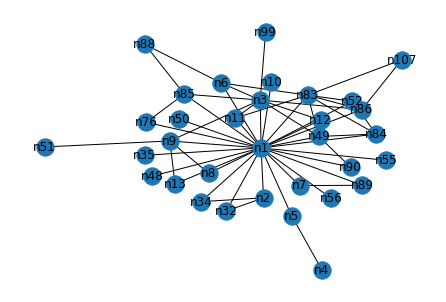

In [ ]:
nx.draw(G[3], pos=nx.drawing.nx_agraph.graphviz_layout(G[3]), with_labels=True)

For each of the 11 phases and for each of the players under investigation (i.e., the 23 listed above) , compute and list the normalized degree centrality of the player.

The normalized degree centrality of node  is defined as

 			 	 
where  is the degree of node  and  is the number of nodes in the graph.

You can compute the normalized degree centrality using the networkx function networkx.degree_centrality.

Provide the degree centrality for the following four players, at the specified phases: (Provide your answer to three significant figures, answer graded to 1% tolerance.)

In [ ]:
# https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.degree_centrality.html#networkx.algorithms.centrality.degree_centrality
for phase in [3,9]:
    degree_centrality_dict = nx.degree_centrality(G[phase])
    print('Phase', phase)
    print('n1 degree_centrality', degree_centrality_dict['n1'])
    print('n3 degree_centrality', degree_centrality_dict['n3'])
    print('n12 degree_centrality', degree_centrality_dict['n12'])
    print('n83 degree_centrality', degree_centrality_dict['n83'])

Phase 3
n1 degree_centrality 0.84375
n3 degree_centrality 0.28125
n12 degree_centrality 0.0625
n83 degree_centrality 0.25
Phase 9
n1 degree_centrality 0.30303030303030304
n3 degree_centrality 0.33333333333333337
n12 degree_centrality 0.24242424242424243
n83 degree_centrality 0.030303030303030304


For each of the 11 phases and for each of the players under investigation, compute and list the normalized betweenness centrality of the player.

For undirected graphs, the normalized betweenness centrality for node  is defined as

 		 	 
where  is the number of shortest paths between  and  that pass through  and  is the total number of shortest paths between  and . Note that this considers both orderings of each pair of nodes, so for undirected graphs, a path counts twice (as it counts both for  and for ).

You can compute the normalized betweenness centrality using the networkx function networkx.betweenness_centrality(graph, normalized = True)

Provide the normalized betweenness centrality for the following four players, at the specified phases: (Provide your answer to three significant figures, answer graded to 1% tolerance.)

In [ ]:
# https://networkx.org/documentation/networkx-1.10/reference/generated/networkx.algorithms.centrality.betweenness_centrality.html
for phase in [3,9]:
  
    betweenness_centrality_dict = nx.betweenness_centrality(G[phase], normalized = True)
    print('Phase', phase)
    print('n1 betweenness_centrality', betweenness_centrality_dict['n1'])
    print('n3 betweenness_centrality', betweenness_centrality_dict['n3'])
    print('n12 betweenness_centrality', betweenness_centrality_dict['n12'])
    print('n83 betweenness_centrality', betweenness_centrality_dict['n83'])

Phase 3
n1 betweenness_centrality 0.829502688172043
n3 betweenness_centrality 0.09549731182795697
n12 betweenness_centrality 0.0
n83 betweenness_centrality 0.046572580645161295
Phase 9
n1 betweenness_centrality 0.2490530303030303
n3 betweenness_centrality 0.5762310606060607
n12 betweenness_centrality 0.3573232323232323
n83 betweenness_centrality 0.0


For each of the 11 phases and for each of the players under investigation, compute and list the eigenvector centrality of the player.

Ensure your eigenvector centrality is normalized as

 
You can compute the eigenvector centrality with this normalization using the networkx function networkx.eigenvector_centrality.

Provide the eigenvector centrality for the following four players, at the specified phases: (Provide your answer to three significant figures, answer graded to 1% tolerance.)

In [ ]:
# https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.eigenvector_centrality.html#networkx.algorithms.centrality.eigenvector_centrality
for phase in [3,9]:
    eigenvector_centrality_dict = nx.eigenvector_centrality(G[phase])
    print('Phase', phase)
    print('n1 eigenvector_centrality', eigenvector_centrality_dict['n1'])
    print('n3 eigenvector_centrality', eigenvector_centrality_dict['n3'])
    print('n12 eigenvector_centrality', eigenvector_centrality_dict['n12'])
    print('n83 eigenvector_centrality', eigenvector_centrality_dict['n83'])

Phase 3
n1 eigenvector_centrality 0.5938791958045414
n3 eigenvector_centrality 0.291304887672891
n12 eigenvector_centrality 0.1359904690175954
n83 eigenvector_centrality 0.27749730090075797
Phase 9
n1 eigenvector_centrality 0.4589575176167988
n3 eigenvector_centrality 0.46798771473230655
n12 eigenvector_centrality 0.14065936326685183
n83 eigenvector_centrality 0.09178102356758049


The mathematical definition of each of these metrics, along with the algorithm that is best suited to compute it and the corresponding time complexity.

Which algorithm is the fastest for this data set?

- Degree centrality
- Betweenness centrality
- Eigenvector centrality

Ans - Degree centrality as it has higher values than the rest.

The data from questions 1 to 3 can be used to perform different types of quantitative analyses. In this question we will look at performing one such analysis - we will determine the temporal consistency of a player's centrality , i.e. which players consistently remained active and central throughout most of the phases and which didn't?

To answer this question, look at the temporal evolution of the networks and calculate the mean centrality for each of the centrality metrics, across all phases, for every player.

Note: As every actor might not be present in every phase, attach a centrality of zero (0) to an actor for the phases in which they are not present, before calculating these statistics, so that you take a mean over all 11 phases for all actors. (Food for thought , not graded: What are the implications of this step? What else could you do to ensure that your numbers are comparable with each other?)

For the betweenness centrality, which three players have the highest mean? (Enter an integer, eg: 1 for n1, 2 for n2, etc.)

In [ ]:
allphase_eigenvector = pd.DataFrame(np.zeros((110, 11)))
allphase_eigenvector.index = np.char.add('n', np.arange(1,111).astype(str))
allphase_eigenvector.columns = np.char.add('phase', np.arange(1,12).astype(str))

allphase_betweenness = pd.DataFrame(np.zeros((110, 11)))
allphase_betweenness.index = np.char.add('n', np.arange(1,111).astype(str))
allphase_betweenness.columns = np.char.add('phase', np.arange(1,12).astype(str))


for phase in np.arange(1,12):
  
    eigenvector_centrality_dict = nx.eigenvector_centrality(G[phase])
    betweenness_centrality_dict = nx.betweenness_centrality(G[phase], normalized = True)

    for k_e,v_e in eigenvector_centrality_dict.items():
        allphase_eigenvector[f'phase{phase}'][k_e] = v_e

    for k_b,v_b in betweenness_centrality_dict.items():
        allphase_betweenness[f'phase{phase}'][k_b] = v_b

In [ ]:
print('n1 eigenvector_centrality', np.mean(allphase_eigenvector, axis=1).sort_values(ascending=False).head())
print('n1 betweenness_centrality', np.mean(allphase_betweenness, axis=1).sort_values(ascending=False).head())

n1 eigenvector_centrality n1     0.546391
n3     0.298095
n85    0.190612
n76    0.165877
n83    0.153522
dtype: float64
n1 betweenness_centrality n1     0.655051
n12    0.167562
n3     0.129403
n76    0.083791
n87    0.061327
dtype: float64


Now, we will attempt to analyze the overall evolution of the network and correlate the patterns we observe to events that happened during the investigation.

The plots below visualizes the criminal network for 2 consecutive phases Phase X and X+1. Identify X using your visualization in Part (a) Question 2.